In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from imblearn.combine import SMOTETomek



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_data = pd.read_csv("../2_Data_Clean/hr/train_data.csv")

X = train_data.drop(["Class"], axis = 1)
y = train_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 7)

sampler = SMOTETomek()
X_resample, y_resample = sampler.fit_sample(X_train, y_train)

In [3]:
pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [4]:
from scipy.stats import randint

param_grid = {
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__n_estimators':randint(100,1000)
}

random_cv = RandomizedSearchCV(estimator = pipe,param_distributions = param_grid, cv =10, error_score = 0,
                               n_iter = 10 , scoring = 'f1',return_train_score=True, n_jobs = 2)

In [6]:
random_cv.fit(X_resample, y_resample)

RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7133e16b38>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

Text(33,0.5,'True value')

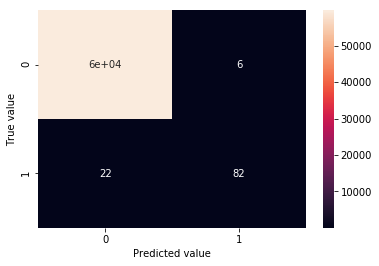

In [7]:
y_pred = random_cv.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

sns.heatmap(cm, annot = True)
plt.xlabel("Predicted value")
plt.ylabel("True value")

In [8]:
print("The total time used is {} hrs.".format(random_cv.cv_results_['mean_fit_time'].sum()*10/3600))

The total time used is 24.69097147670057 hrs.


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59706
          1       0.93      0.79      0.85       104

avg / total       1.00      1.00      1.00     59810



In [14]:
y_pred_train = random_cv.predict(X_train)
print(classification_report(y_true = y_train, y_pred = y_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    139313
          1       1.00      1.00      1.00       241

avg / total       1.00      1.00      1.00    139554



In [15]:
y_pred_resample = random_cv.predict(X_resample)
print(classification_report(y_true = y_resample, y_pred = y_pred_resample))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    138862
          1       1.00      1.00      1.00    138862

avg / total       1.00      1.00      1.00    277724



## The best F1 score for randomForest wit SmoteTomek resampling is 0.85. 